In [1]:
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('data/*.{}'.format(extension))]
df = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [3]:
font = {'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [4]:
def plot_results(df, model_name):
    labels = model_name +"\n"+ df.version.astype(str)
    x = np.arange(len(labels))  # the label locations
    width = 0.60  # the width of the bars
    fig, ax = plt.subplots(figsize=(20, 10))
    rects1 = ax.bar(x - width/3, df['vs negamax win'], width/3, label='Negamax')
    rects2 = ax.bar(x, df['vs random win'], width/3, label='Random')
    rects3 = ax.bar(x + width/3, df['vs adv_agent win'], width/3, label='Lookahead')


    ax.set_ylabel('score')
    ax.set_title('Scores by model')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=2)
    ax.bar_label(rects2, padding=2)
    ax.bar_label(rects3, padding=2)

    fig.tight_layout()

    plt.show()

def plot_top_3(df):
    top_3 = df.sort_values(by=['vs negamax win'])
    plot_results(top_3[-3:])


In [5]:
df.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
0,si_agent7_second,10000,0.71,0,0.03,0,0,0,0.7,2022-05-27 13:01:59.992042
1,si_agent7_second,20000,0.74,0,0.02,0,0,0,0.7,2022-05-27 13:03:06.016496
2,si_agent7_second,30000,0.82,0,0.0,0,0,0,0.8,2022-05-27 13:04:10.958189
3,si_agent7_second,40000,0.77,0,0.01,0,0,0,0.7,2022-05-27 13:05:35.083663
4,si_agent7_second,50000,0.86,0,0.0,0,0,0,0.8,2022-05-27 13:06:55.892999


In [6]:
df_top = df.sort_values(by=['vs adv_agent win'])
df_top = df_top.drop_duplicates(subset = ["model"], keep='last')
df_top = df_top.sort_values(by=['vs adv_agent win'], ascending=False)
df_top.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
8,si_agent2_vs_adv,900000,0.77,0,0.51,0,0,0,3.2,2022-05-27 01:50:06.355953
44,si_agent7_vs_adv,450000,0.76,0,0.49,0,0,0,2.7,2022-05-27 14:36:29.691614
1,si_agent1_vs_adv,200000,0.74,0,0.46,0,0,0,2.7,2022-05-27 00:18:56.929822
101,si_agent8_second_vs_adv,1020000,0.91,0,0.43,0,0,0,2.9,2022-05-27 17:03:13.348589
99,si_agent8_vs_adv,1000000,0.78,0,0.43,0,0,0,2.7,2022-05-27 18:19:02.682972


In [7]:
db_by_score = df.sort_values(by=['vs random win'], ascending=False)

db_by_score.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
4,si_agent8_second_vs_adv,50000,0.96,0,0.04,0,0,0,0.9,2022-05-27 13:57:29.628440
70,si_agent8_second_vs_adv,710000,0.96,0,0.31,0,0,0,2.4,2022-05-27 16:06:37.186942
88,si_agent8_second_vs_adv,890000,0.95,0,0.39,0,0,0,2.4,2022-05-27 16:38:39.419453
20,si_agent8_second_vs_adv,210000,0.95,0,0.08,0,0,0,0.9,2022-05-27 14:28:38.518285
72,si_agent8_second_vs_adv,730000,0.94,0,0.32,0,0,0,2.4,2022-05-27 16:09:59.490138


In [8]:
#filtered_df=df[(df.score < 40) & (df.C_3 > 450)]

def plot_agent_vs(df, vs):
    fig, ax = plt.subplots(figsize=(30, 10))
    df_ppo = df.sort_values(['model', 'version'], ascending=[True, True])


    marker = {
        "marker":"o", 
        "markersize":5
    }

    for model in pd.unique(df['model']):
        models = df_ppo[df_ppo['model']==model]
        ax.plot(models['version'], models[vs], label=model, **marker)

    ax.legend()
    plt.title(f'{vs} /time')
    plt.xlabel('Version')
    plt.ylabel('Win%')
    plt.show()


### Top scorers vs random

5 best performing models vs random

In [9]:
df_top = df.sort_values(by=['vs random win'])
df_top = df_top.drop_duplicates(subset = ["model"], keep='last')
df_top = df_top.sort_values(by=['vs random win'], ascending=False)
df_top.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
70,si_agent8_second_vs_adv,710000,0.96,0,0.31,0,0,0,2.4,2022-05-27 16:06:37.186942
8,si_agent5,90000,0.92,0,0.05,0,0,0,0.9,2022-05-27 09:05:30.550903
7,si_agent8_second,80000,0.91,0,0.07,0,0,0,0.9,2022-05-27 13:45:24.375809
5,si_agent7_second,60000,0.91,0,0.03,0,0,0,0.9,2022-05-27 13:07:59.740709
16,si_agent2_vs_adv,1700000,0.89,0,0.42,0,0,0,2.8,2022-05-27 03:37:00.492901


### Best avg vs random


In [10]:
df_mean = df.groupby('model', as_index=False)['vs random win'].mean()
df_mean = df_mean.sort_values(by=['vs random win'], ascending=False)

print(df_mean)

                      model  vs random win
19  si_agent8_second_vs_adv       0.878966
9                 si_agent5       0.853000
18         si_agent8_second       0.822000
13                si_agent7       0.821000
11                si_agent6       0.810000
14         si_agent7_second       0.807000
0                 si_agent1       0.802000
3          si_agent2_vs_adv       0.799808
6                 si_agent4       0.782000
17                si_agent8       0.779000
1          si_agent1_vs_adv       0.777500
4                 si_agent3       0.771000
20         si_agent8_vs_adv       0.767723
16         si_agent7_vs_adv       0.765857
2                 si_agent2       0.755000
5         si_agent3_vs_self       0.746034
12         si_agent6_vs_adv       0.727333
15  si_agent7_second_vs_adv       0.701034
7          si_agent4_vs_adv       0.684000
8      si_agent4_vs_negamax       0.676667
10         si_agent5_vs_adv       0.647273


### Best avg vs random (second half training)

In [11]:
df_mean = df.groupby('model', as_index=False)['vs random win'].mean()

df_mean = df_mean.sort_values(by=['vs random win'], ascending=False)
print(df_mean)

                      model  vs random win
19  si_agent8_second_vs_adv       0.878966
9                 si_agent5       0.853000
18         si_agent8_second       0.822000
13                si_agent7       0.821000
11                si_agent6       0.810000
14         si_agent7_second       0.807000
0                 si_agent1       0.802000
3          si_agent2_vs_adv       0.799808
6                 si_agent4       0.782000
17                si_agent8       0.779000
1          si_agent1_vs_adv       0.777500
4                 si_agent3       0.771000
20         si_agent8_vs_adv       0.767723
16         si_agent7_vs_adv       0.765857
2                 si_agent2       0.755000
5         si_agent3_vs_self       0.746034
12         si_agent6_vs_adv       0.727333
15  si_agent7_second_vs_adv       0.701034
7          si_agent4_vs_adv       0.684000
8      si_agent4_vs_negamax       0.676667
10         si_agent5_vs_adv       0.647273


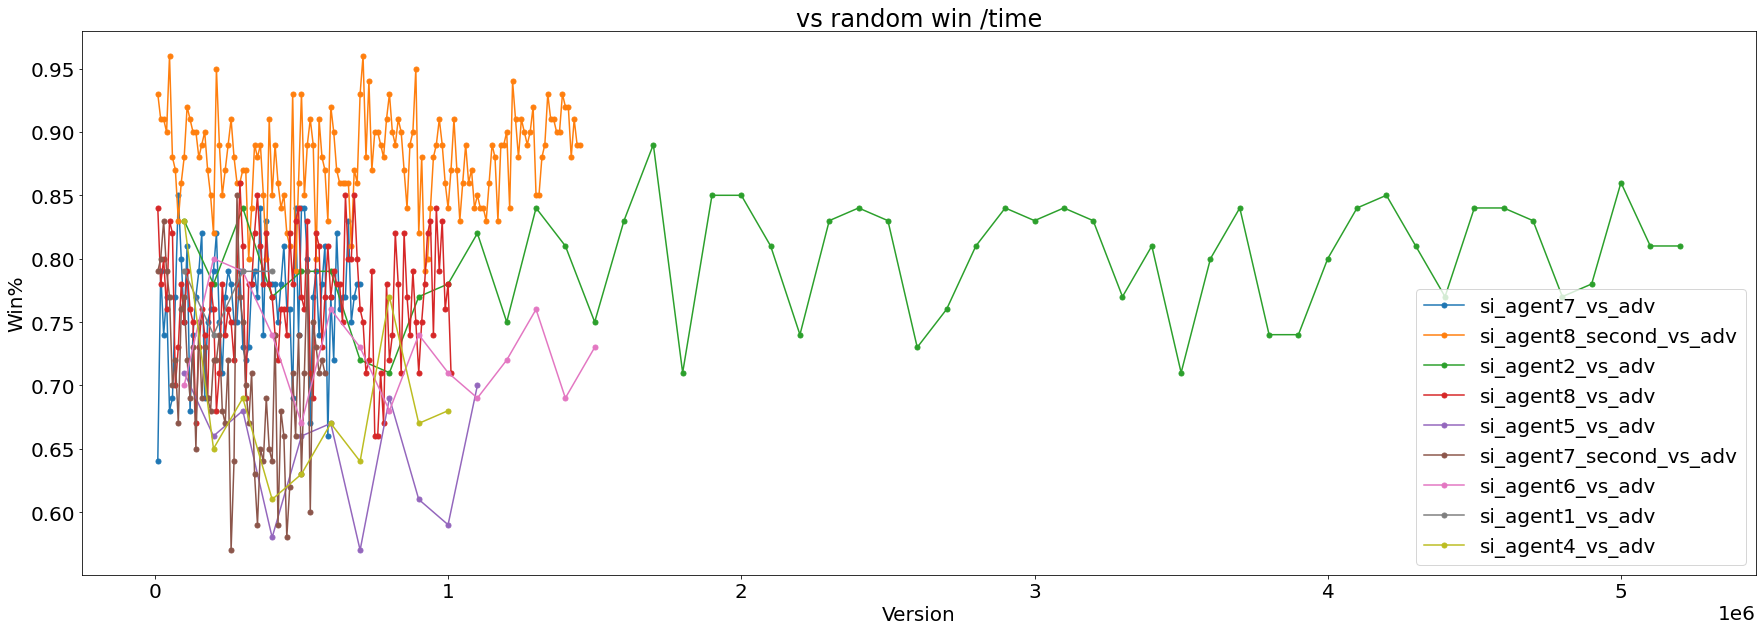

In [12]:
df_mean = df_mean[0:5]

models = [m for m in df['model'] if m.endswith("vs_adv")]

plot_agent_vs(df[df.model.isin(models)], "vs random win")

### Top scorers vs adv

5 best performing models vs adv

In [13]:
df_top = df.sort_values(by=['vs adv_agent win'])
df_top = df_top.drop_duplicates(subset = ["model"], keep='last')
df_top = df_top.sort_values(by=['vs adv_agent win'], ascending=False)
df_top.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score,saved on
8,si_agent2_vs_adv,900000,0.77,0,0.51,0,0,0,3.2,2022-05-27 01:50:06.355953
44,si_agent7_vs_adv,450000,0.76,0,0.49,0,0,0,2.7,2022-05-27 14:36:29.691614
1,si_agent1_vs_adv,200000,0.74,0,0.46,0,0,0,2.7,2022-05-27 00:18:56.929822
101,si_agent8_second_vs_adv,1020000,0.91,0,0.43,0,0,0,2.9,2022-05-27 17:03:13.348589
99,si_agent8_vs_adv,1000000,0.78,0,0.43,0,0,0,2.7,2022-05-27 18:19:02.682972


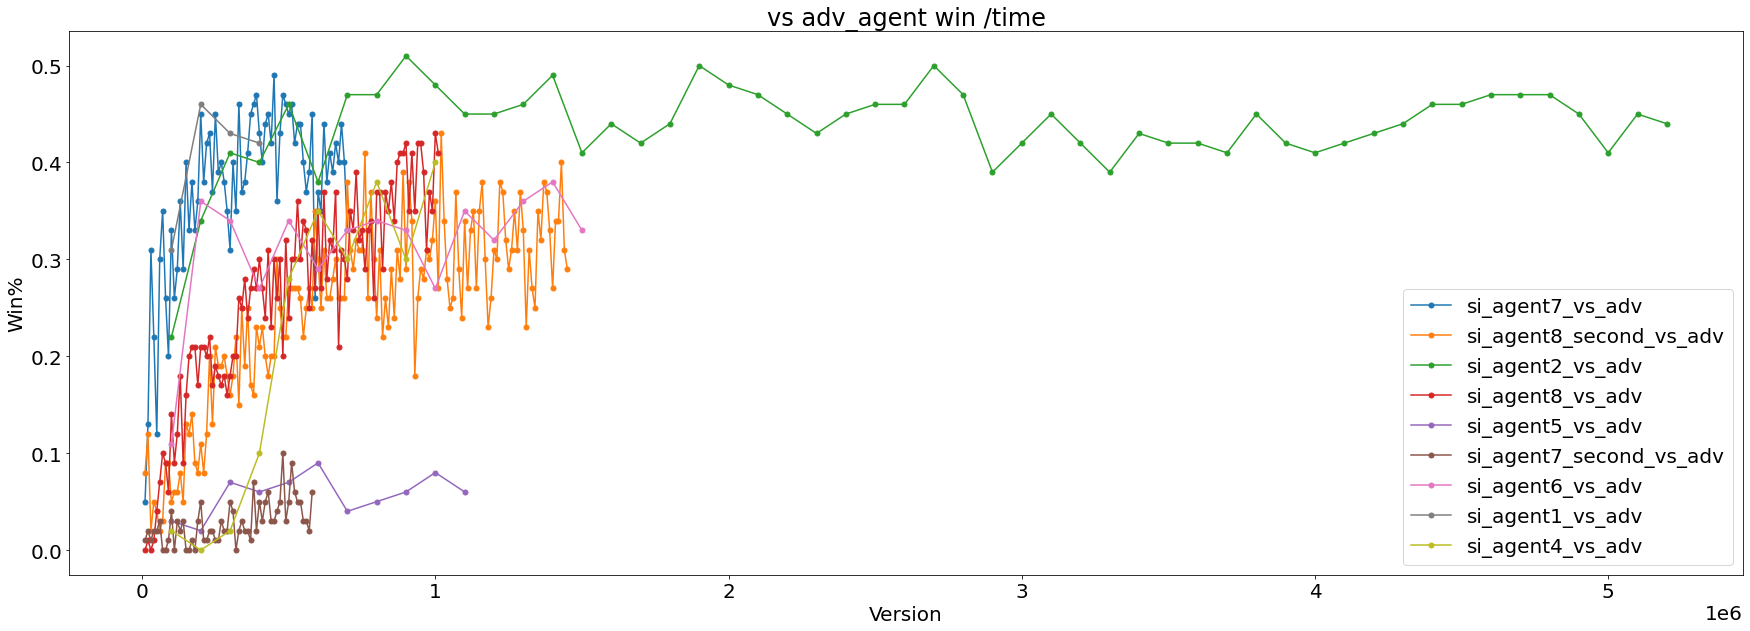

In [14]:
models = [m for m in df['model'] if m.endswith("vs_adv")]

plot_agent_vs(df[df.model.isin(models)], "vs adv_agent win")

### Best results vs random

In [15]:
def sort_by_rnd_win(df):
    return df.sort_values(by=['vs random win'], ascending=False)
model_group = df.groupby('model', as_index=False)['vs random win']
#df_max = df.groupby('model', as_index=False)['vs random win'].max().sort_values(by=['vs random win'], ascending=False)
max_df = model_group.max()
max_df.rename(columns = {'vs random win':'max'}, inplace = True)
mean_df = model_group.mean()
mean_df.rename(columns = {'vs random win':'mean'}, inplace = True)

eval_df = pd.merge(max_df, mean_df, left_index=True, right_index=True)
eval_df = eval_df.sort_values(by=['mean','max'], ascending=False)
eval_df = eval_df.drop(columns=['model_y'])

eval_df

,model_x,max,mean
19,si_agent8_second_vs_adv,0.96,0.878966
9,si_agent5,0.92,0.853000
18,si_agent8_second,0.91,0.822000
13,si_agent7,0.86,0.821000
11,si_agent6,0.88,0.810000
14,si_agent7_second,0.91,0.807000
0,si_agent1,0.88,0.802000
3,si_agent2_vs_adv,0.89,0.799808
6,si_agent4,0.86,0.782000
17,si_agent8,0.88,0.779000


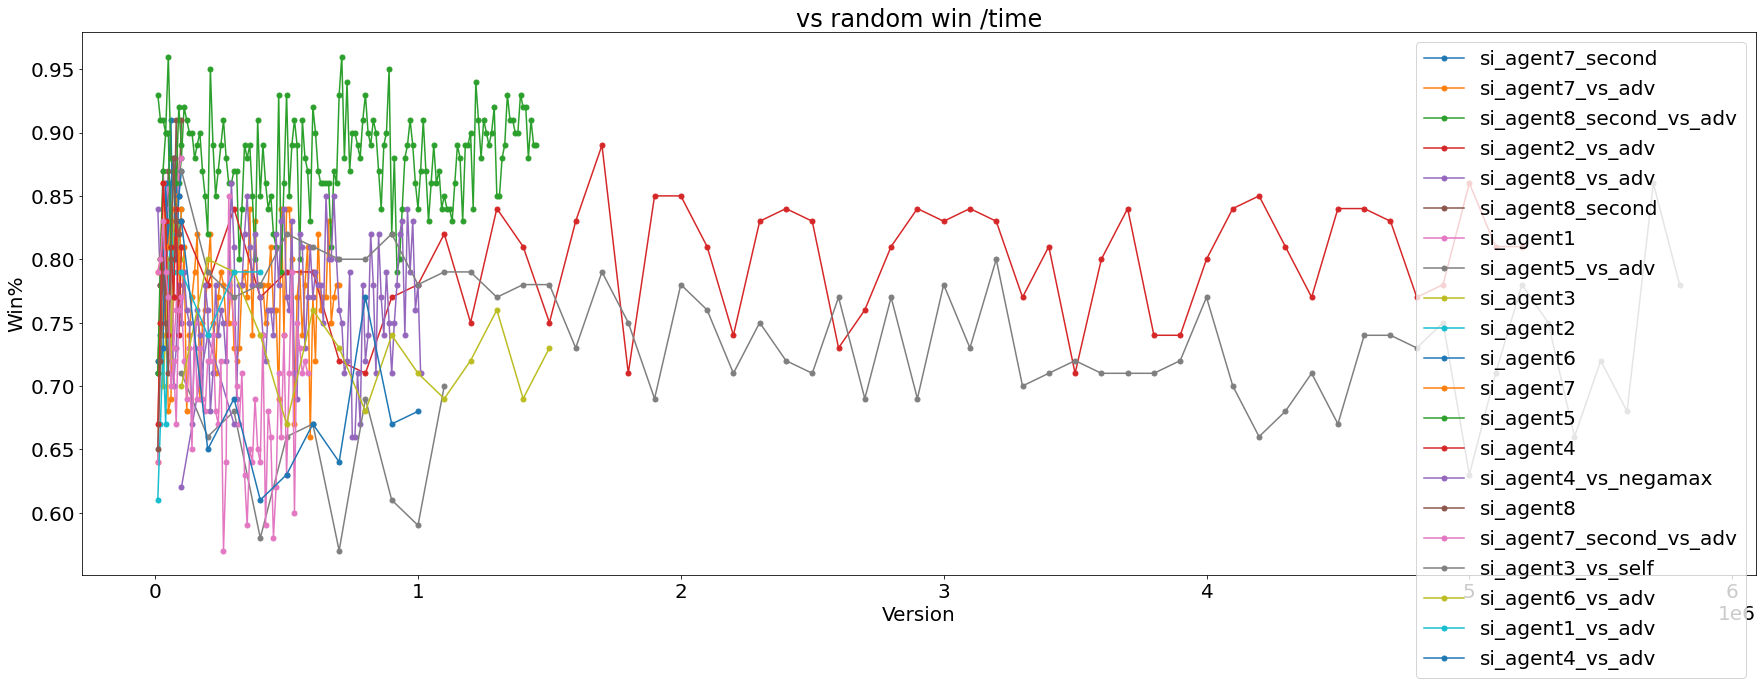

In [16]:
plot_agent_vs(df, "vs random win")

In [17]:
def plot_agent_over_time(model_name):
    fig, ax = plt.subplots(figsize=(30, 15))
    df_ppo = df[df['model']==model_name].sort_values(by=['version'])

    marker = {
        "marker":"o", 
        "markersize":10
    }


    plt.hlines(y=0.8, xmin=0, xmax=df_ppo['version'].max(), colors='green', linestyles='-', lw=1, label='switch to adv')
    plt.hlines(y=0.5, xmin=0, xmax=df_ppo['version'].max(), colors='tomato', linestyles='-', lw=1, label='switch to random')

    ax.plot(df_ppo['version'], df_ppo['vs random win'], label="vs random", **marker)
    ax.plot(df_ppo['version'], df_ppo['vs adv_agent win'], label="vs adv_agent", **marker)
    ax.plot(df_ppo['version'], df_ppo['vs negamax win'], label="vs negamax", **marker)


    ax.legend()
    plt.title(f'{model_name} win over time')
    plt.xlabel('Version')
    plt.ylabel('Win%')

    ax.legend()

    plt.show()


In [18]:
#plot_agent_over_time("new_aggro_strided_1")

In [19]:
#plot_agent_over_time("look_trained_3")